In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('./Data/DSPhongTro_DaXuLy.csv', sep='\t')
data.head()

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,16,20.0,1.0,1.0,2,4.0,2024-10-22
1,16,60.0,2.0,2.0,0,10.0,2024-10-23
2,3,45.0,1.0,1.0,0,7.3,2024-10-23
3,2,30.0,1.0,1.0,2,4.1,2024-10-17
4,19,28.0,1.0,1.0,0,2.8,2024-10-23


In [44]:
mapping = {
    1: "Quận 1", 3: "Quận 3", 4: "Quận 4", 5: "Quận 5", 6: "Quận 6",
    7: "Quận 7", 8: "Quận 8", 10: "Quận 10", 11: "Quận 11", 12: "Quận 12",
    2: "Bình Thạnh", 9: "Gò Vấp", 13: "Phú Nhuận", 14: "Tân Bình", 15: "Tân Phú",
    16: "Bình Tân", 17: "Thủ Đức", 18: "Bình Chánh", 19: "Cần Giờ",
    20: "Củ Chi", 21: "Hóc Môn", 22: "Nhà Bè"
}
mapping_noi_that = {0: "Không", 1: "Cơ bản", 2: "Đầy đủ", 3: "Cao cấp"}

In [45]:
data.dtypes

Địa chỉ            int64
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất           int64
Mức giá          float64
Ngày đăng tin     object
dtype: object

### Phân khúc khách hàng

#### Câu hỏi 1: Liệu mức giá thuê có thay đổi như thế nào giữa các khu vực (Địa chỉ) và diện tích phòng, và phân khúc khách hàng nào thường chọn phòng có diện tích lớn hoặc nhỏ ở mỗi khu vực đó?

##### Ý nghĩa của việc trả lời câu hỏi

- Trả lời câu hỏi này giúp xác định mối quan hệ giữa vị trí (Địa chỉ), diện tích và mức giá thuê. Việc phân tích này có thể làm rõ các khu vực có mức giá phòng cao hay thấp, đồng thời nhận diện được các phân khúc khách hàng nào ưa thích các loại phòng có diện tích lớn hoặc nhỏ, từ đó tối ưu hóa chiến lược marketing hoặc phân phối phòng trọ.

##### Phân tích hướng xử lí

- Các bước thực hiện:
    + Phân nhóm dữ liệu theo Địa chỉ (khu vực) và Diện tích.
    + Tính toán mức giá trung bình theo mỗi khu vực và diện tích.
    + Phân tích mối quan hệ giữa giá và diện tích trong từng khu vực để thấy được xu hướng thuê của khách hàng.
- Kết quả mong đợi:
    + Xác định các phân khúc khách hàng và các khu vực có mức giá thuê phù hợp với diện tích phòng.
    + Đưa ra dự báo về nhu cầu của khách hàng ở từng khu vực, từ đó tối ưu hóa chiến lược cho thuê.

##### Tiền xử lí

In [46]:
data_Q1 = data[['Địa chỉ', 'Diện tích', 'Mức giá']].copy()
data_Q1['Địa chỉ'] = data_Q1['Địa chỉ'].map(mapping)
data_Q1['Nhóm diện tích'] = np.where(data_Q1['Diện tích'] < 20, 'Nhỏ', np.where(data_Q1['Diện tích'] < 40, 'Vừa', 'Lớn'))
desired_order_Q1 = ['Nhỏ', 'Vừa', 'Lớn']

##### Phân tích để trả lời câu hỏi

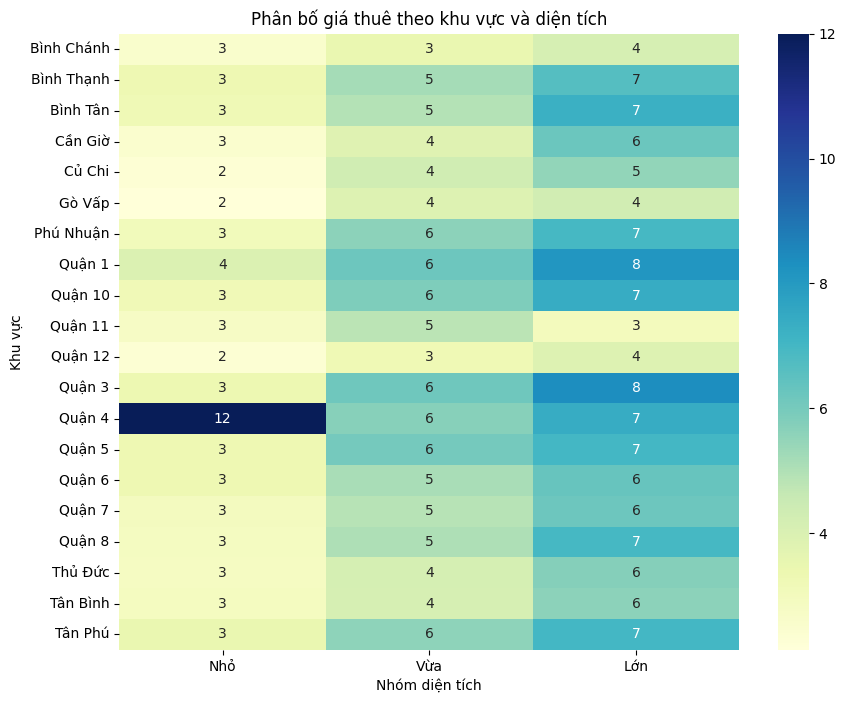

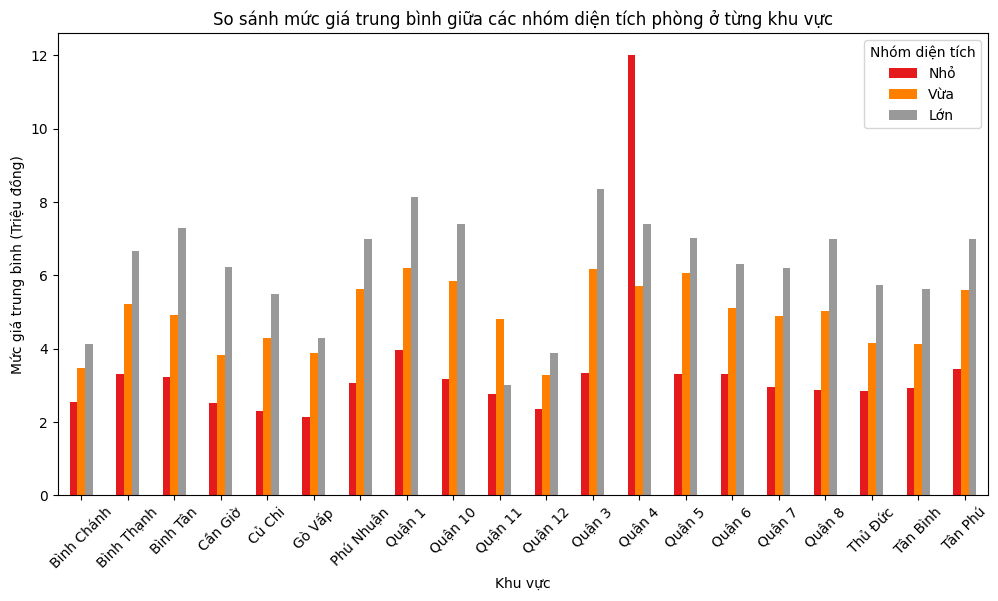

In [47]:
pivot = data_Q1.pivot_table(values='Mức giá', index='Địa chỉ', columns='Nhóm diện tích', aggfunc='mean')
pivot = pivot[desired_order_Q1]  # Đặt lại thứ tự cột theo danh sách mong muốn

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Phân bố giá thuê theo khu vực và diện tích')
plt.xlabel('Nhóm diện tích')
plt.ylabel('Khu vực')
plt.show()

# Tính giá trung bình
avg_price = data_Q1.groupby(['Địa chỉ', 'Nhóm diện tích'])['Mức giá'].mean().unstack()
avg_price = avg_price[desired_order_Q1]
avg_price.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title('So sánh mức giá trung bình giữa các nhóm diện tích phòng ở từng khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Mức giá trung bình (Triệu đồng)')
plt.legend(title='Nhóm diện tích')
plt.xticks(rotation=45)
plt.show()

**Các nhóm mức giá**
- **Mức giá rất thấp:** < 3 triệu đồng / tháng
- **Mức giá thấp:** từ 3 - 4.5 triệu đồng / tháng
- **Mức giá vừa:** từ 4.5 - 6 triệu đồng / tháng
- **Mức giá cao:**  > 6.5 triệu đồng / tháng

Từ biều đồ chúng ta có thể thấy:
- Đối với nhóm diện tích nhỏ thì chúng ta có thể thấy mức giá ở các khu vực chia làm 3 mức:
    + Mức giá rất thấp: Bình Chánh, Cần Giờ, Củ Chi, Quận 12, Thủ Đức, Tân Bình, Quận 7, Quận 8, Thủ Đức, Tân Bình
    + Mức giá thấp: Các khu vực còn lại (trừ Quận 4)
    + Riêng quận 4 có mức giá rất lớn => Có khả năng thông tin bất thường, cần kiểm tra lại dữ liệu. Nếu hợp lý, nhóm này có thể hướng đến người trẻ tuổi, nhân viên văn phòng có thu nhập cao, muốn ở gần trung tâm thành phố.
- Đối với nhóm diện tích vừa thì chúng ta có thể thấy rõ mức giá ở các khu vực chia làm 3 mức:
    + Mức giá thấp: Bình Chánh, Cần Giờ, Củ Chi, Quận 12, Thủ Đức, Tân Bình, Gò VấpVấp
    + Mức giá vừa: Các khu vực còn lại
- Đối với nhóm diện tích lớn: Chúng ta có thể thấy mức giá ở các khu vực cũng chia làm 3 mức:
    + Mức giá thấp: Bình Chánh, Gò Vấp, Quận 11, Quận 12
    + Mức giá vừa: Cần Giờ, Củ Chi, Quận 6, Quận 7, Thủ Đức, Tân Bình
    + Mức giá cao: Các khu vực còn lại

**Kiểm tra lại thông tin các phòng trọ có diện tích nhỏ ở quận 4**

1. Lấy thông tin các phòng trọ có diện tích nhỏ ở quận 4

In [48]:
check = data_Q1[(data_Q1['Địa chỉ'] == 'Quận 4') & (data_Q1['Nhóm diện tích'] == 'Nhỏ')].copy()
check

,Địa chỉ,Diện tích,Mức giá,Nhóm diện tích
3316,Quận 4,10.0,12.0,Nhỏ


2. Xác minh dữ liệu


In [49]:
raw_data = pd.read_csv('./Data/DSPhongTro.csv', sep='\t')

for i in range(len(check)):
    # Lấy giá trị từ dòng hiện tại của DataFrame 'check'
    dia_chi_check = f'{check.iloc[i]['Địa chỉ']},'
    dien_tich_check = check.iloc[i]['Diện tích']
    muc_gia_check = f'{check.iloc[i]['Mức giá']}'

    # Lọc dữ liệu dựa trên các điều kiện
    result = raw_data[
        (raw_data['Địa chỉ'].str.contains(dia_chi_check, na=False)) &  # Kiểm tra chuỗi con
        (raw_data['Diện tích'] == dien_tich_check) & 
        (raw_data['Mức giá'] == muc_gia_check)
    ]

    # In ra cột 'Link' của các dòng khớp
    print(result['Link'])


9262    https://batdongsan.com.vn/cho-thue-nha-tro-pho...
Name: Link, dtype: object


- Sau khi kiểm tra chi tiết từ link của dòng dữ liệu bất thường, xác nhận rằng đây là một căn nhà, không phải phòng trọ => loại bỏ dòng dữ dữ liệu này

3. Loại bỏ dòng dữ liệu bất thường

In [50]:
print('kích thước dữ liệu ban đầu:', data.shape)
data = data.drop(check.index)
print('kích thước dữ liệu sau khi xóa:', data.shape)

kích thước dữ liệu ban đầu: (4600, 7)
kích thước dữ liệu sau khi xóa: (4599, 7)


In [51]:
#Lưu lại dữ liệu sau khi đã xóa
data.to_csv('./Data/DSPhongTro_DaXuLy.csv', sep='\t', index=False)

**Trực quan hóa lại dữ liệu sau khi đã xử lí**

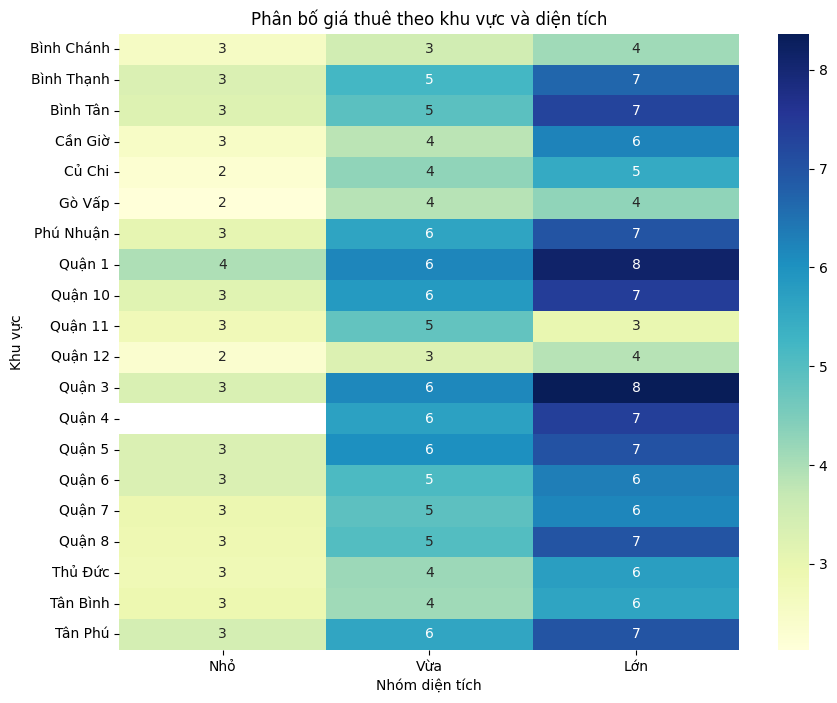

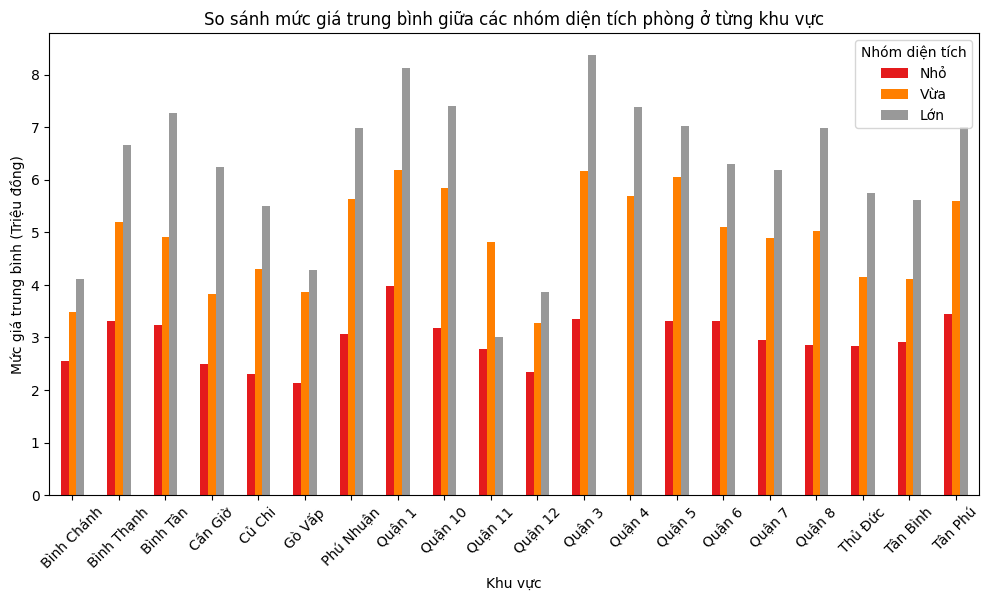

In [52]:
data = pd.read_csv('./Data/DSPhongTro_DaXuLy.csv', sep='\t')

#tiền xử lí dữ liệu
data_Q1 = data[['Địa chỉ', 'Diện tích', 'Mức giá']].copy()
data_Q1['Địa chỉ'] = data_Q1['Địa chỉ'].map(mapping)
data_Q1['Nhóm diện tích'] = np.where(data_Q1['Diện tích'] < 20, 'Nhỏ', np.where(data_Q1['Diện tích'] < 40, 'Vừa', 'Lớn'))
desired_order_Q1 = ['Nhỏ', 'Vừa', 'Lớn']

#Trực quan hóa dữ liệu
pivot = data_Q1.pivot_table(values='Mức giá', index='Địa chỉ', columns='Nhóm diện tích', aggfunc='mean')
pivot = pivot[desired_order_Q1]  # Đặt lại thứ tự cột theo danh sách mong muốn

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Phân bố giá thuê theo khu vực và diện tích')
plt.xlabel('Nhóm diện tích')
plt.ylabel('Khu vực')
plt.show()

# Tính giá trung bình
avg_price = data_Q1.groupby(['Địa chỉ', 'Nhóm diện tích'])['Mức giá'].mean().unstack()
avg_price = avg_price[desired_order_Q1]
avg_price.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title('So sánh mức giá trung bình giữa các nhóm diện tích phòng ở từng khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Mức giá trung bình (Triệu đồng)')
plt.legend(title='Nhóm diện tích')
plt.xticks(rotation=45)
plt.show()

Từ biểu đồ chúng ta có thể thấy:
- Trước khi xử lý: Nhóm diện tích nhỏ tại khu vực Quận 4 có mức giá rất cao, không hợp lý so với các khu vực khác trong cùng nhóm.
- Sau khi xử lý: Dữ liệu cho thấy Quận 4 không có phòng trọ thuộc nhóm diện tích nhỏ. Điều này phản ánh thực tế rằng khu vực này có thể không cung cấp loại hình phòng trọ diện tích nhỏ, hoặc giá thuê rất cao dẫn đến không có nhu cầu phù hợp trong nhóm này.

##### Kết luận:

Phân khúc khách hàng theo diện tích và mức giá
- Nhóm diện tích nhỏ:
    + Mức giá rất thấp: Các khu vực như Bình Chánh, Cần Giờ, Củ Chi, Quận 12, Thủ Đức, Tân Bình, Quận 7, Quận 8.
        * Khách hàng: Sinh viên, người lao động thu nhập thấp, hoặc người độc thân cần chỗ ở tạm thời.
        * Đặc điểm: Yêu cầu cơ bản, ưu tiên giá rẻ và gần nơi làm việc/học tập.
    + Mức giá thấp: Các khu vực khác (trừ Quận 4).
        * Khách hàng: Nhân viên văn phòng hoặc gia đình nhỏ có thu nhập trung bình, muốn không gian vừa đủ với chi phí hợp lý.
    + Quận 4 (mức giá cao): Sau khi kiểm tra, khu vực Quận 4 không cung cấp loại phòng trọ diện tích nhỏ. Điều này phản ánh thực tế rằng khu vực này có thể tập trung vào các sản phẩm nhà ở cao cấp hơn, không phù hợp với nhu cầu nhóm diện tích nhỏ.
- Nhóm diện tích vừa:
    + Mức giá thấp: Các khu vực như Bình Chánh, Cần Giờ, Củ Chi, Quận 12, Thủ Đức, Tân Bình, Gò Vấp.
        * Khách hàng: Gia đình nhỏ hoặc nhân viên văn phòng muốn tiết kiệm chi phí nhưng vẫn cần không gian thoải mái.
        * Đặc điểm: Chấp nhận ở xa trung tâm để giảm chi phí.
    + Mức giá vừa: Các khu vực khác.
        * Khách hàng: Nhân viên văn phòng thu nhập khá, gia đình trẻ, hoặc người độc thân có nhu cầu sống tiện nghi.
        * Đặc điểm: Ưu tiên cân bằng giữa diện tích, giá cả và vị trí.
- Nhóm diện tích lớn:
    + Mức giá thấp: Các khu vực như Bình Chánh, Gò Vấp, Quận 11, Quận 12.
        * Khách hàng: Gia đình lớn hoặc nhóm người ở chung muốn tiết kiệm chi phí.
        * Đặc điểm: Thường chọn khu vực xa trung tâm để có mức giá hợp lý.
    + Mức giá vừa: Các khu vực như Cần Giờ, Củ Chi, Quận 6, Quận 7, Thủ Đức, Tân Bình.
        * Khách hàng: Gia đình trung lưu hoặc chuyên gia thu nhập khá.
        * Đặc điểm: Cần không gian rộng nhưng ưu tiên khu vực nội thành với tiện ích đầy đủ.
    + Mức giá cao: Các khu vực khác.
        * Khách hàng: Gia đình giàu có, khách hàng cao cấp, hoặc chuyên gia nước ngoài.
        * Đặc điểm: Yêu cầu không gian rộng, tiện nghi cao cấp, và vị trí trung tâm hoặc các khu vực có chất lượng sống cao.

Tóm tắt:
- Nhóm diện tích nhỏ:
    + Mức giá rất thấp: Sinh viên, người lao động thu nhập thấp ở các khu vực ngoại thành (Bình Chánh, Củ Chi, Thủ Đức,...).
    + Mức giá thấp: Nhân viên văn phòng hoặc gia đình nhỏ thu nhập trung bình.
    + Quận 4: Không có phòng trọ diện tích nhỏ sau xử lý, phản ánh nguồn cung hạn chế hoặc giá quá cao.
- Nhóm diện tích vừa:
    + Mức giá thấp: Gia đình nhỏ, nhân viên văn phòng ưu tiên tiết kiệm ở ngoại thành.
    + Mức giá vừa: Nhân viên văn phòng khá giả, gia đình trẻ, ưu tiên tiện nghi gần trung tâm.
- Nhóm diện tích lớn:
    + Mức giá thấp: Gia đình lớn, nhóm người ở chung tìm kiếm không gian rộng ở ngoại thành.
    + Mức giá vừa: Gia đình trung lưu, chuyên gia thu nhập khá, cần không gian thoải mái nội thành.
    + Mức giá cao: Gia đình giàu, chuyên gia nước ngoài, yêu cầu cao về tiện nghi và vị trí.


#### Câu hỏi 2: Có sự khác biệt nào về mức giá thuê giữa các phòng có nội thất và không có nội thất khi xét theo số phòng ngủ và số toilet, và phân khúc khách hàng nào có xu hướng chọn phòng có nội thất?

##### Ý nghĩa của việc trả lời câu hỏi

- Xác định xu hướng khách hàng: Phân loại khách hàng theo nhu cầu chọn phòng có hoặc không có nội thất.
- Tối ưu chiến lược giá: Hiểu rõ mối quan hệ giữa nội thất, số phòng ngủ, số toilet và mức giá thuê để đưa ra mức giá hợp lý, thu hút đúng phân khúc khách hàng.
- Phân khúc khách hàng cụ thể: Nhóm khách hàng có xu hướng chọn phòng có nội thất thường thuộc phân khúc nào (thu nhập cao hơn, nhu cầu tiện nghi).

##### Phân tích hướng xử lí

- Các bước thực hiện:
    + Phân Nhóm theo Số phòng ngủ, Số toilet, và Nội thất.
    + Tính toán mức giá trung bình (mean) cho từng nhóm phòng (theo số phòng ngủ, số toilet, và nội thất)
    + Trực quan hóa dữ liệu
    + Phân tích xu hướng lựa chọn dựa trên mức giá trung bình và các tổ hợp phòng (Số phòng ngủ, Số toilet, Nội thất)
- Kết quả mong đợi:
    + Thấy được sự khác biệt về mức giá
    + Đưa ra dự báo về nhu cầu của khách hàng, từ đó tối ưu hóa chiến lược cho thuê.

##### Tiền xử lí

In [53]:
data_Q2 = data[['Mức giá', 'Nội thất', 'Số phòng ngủ', 'Số toilet']].copy()
data_Q2['Nội thất'] = data_Q2['Nội thất'].map(mapping_noi_that)
data_Q2 = data_Q2[data_Q2['Mức giá'] < 650]
desired_order_Q2 = ['Không', 'Cơ bản', 'Đầy đủ', 'Cao cấp']
data_Q2['Nội thất'] = pd.Categorical(data_Q2['Nội thất'], categories=desired_order_Q2, ordered=True)

##### Phân tích và trả lời câu hỏi

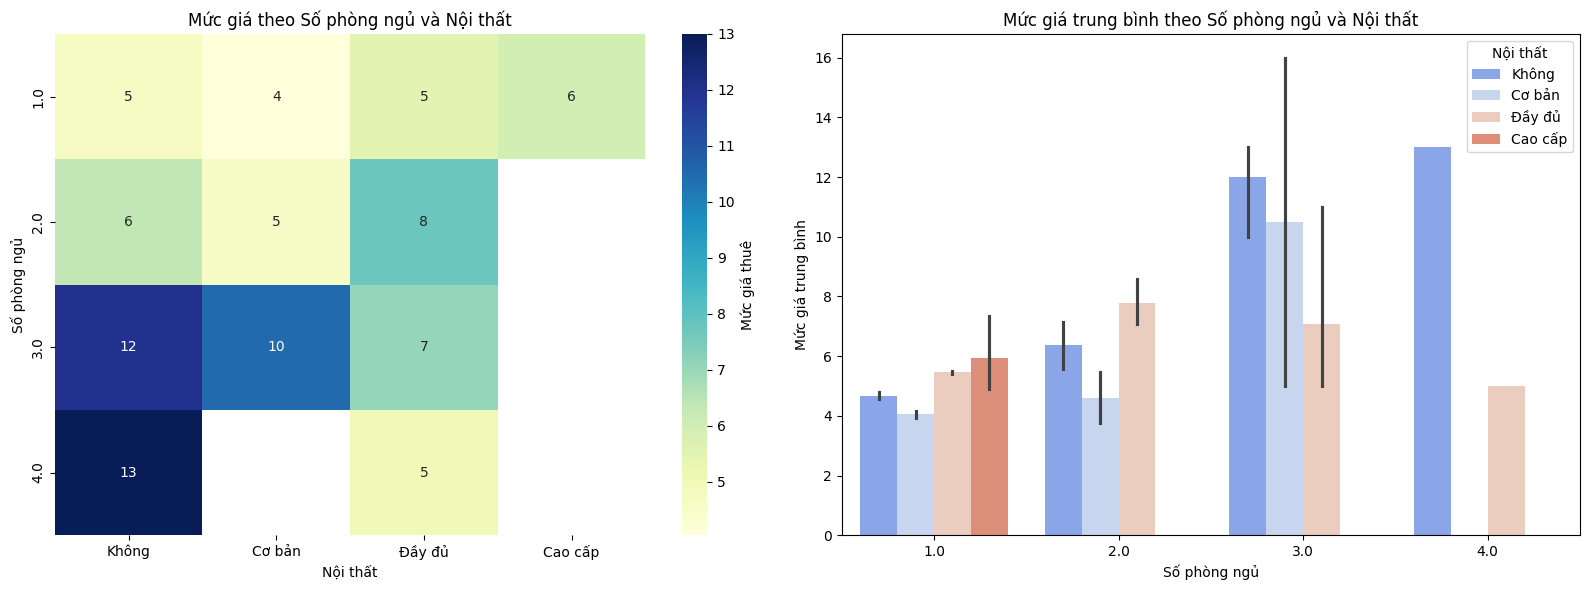

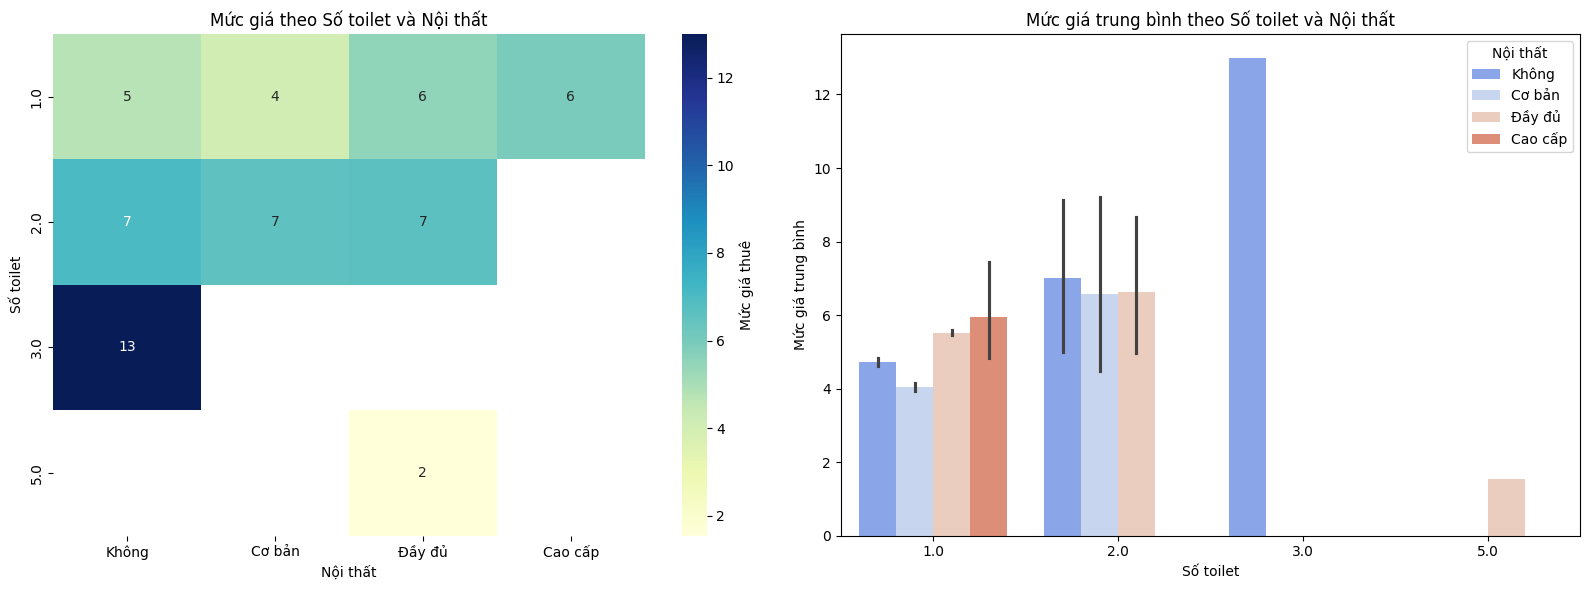

In [54]:
def plot_combined(data, name):
    # Tạo một figure với 2 cột, cột 1 cho Heatmap, cột 2 cho Bar plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # **Biểu đồ Heatmap (Bên trái)**
    pivot = data.pivot_table(values='Mức giá', index=name, columns='Nội thất', aggfunc='mean', observed=False)
    sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[0], cbar_kws={'label': 'Mức giá thuê'})
    axes[0].set_title(f'Mức giá theo {name} và Nội thất')
    axes[0].set_xlabel('Nội thất')
    axes[0].set_ylabel(name)
    
    # **Biểu đồ Bar (Bên phải)**
    sns.barplot(data=data, x=name, y='Mức giá', hue='Nội thất', palette='coolwarm', ax=axes[1])
    axes[1].set_title(f'Mức giá trung bình theo {name} và Nội thất')
    axes[1].set_xlabel(name)
    axes[1].set_ylabel('Mức giá trung bình')

    # Hiển thị cả 2 biểu đồ
    plt.tight_layout()
    plt.show()

plot_combined(data_Q2, 'Số phòng ngủ')
plot_combined(data_Q2, 'Số toilet')

Từ biểu đồ chúng ta có thể thấy:
- Nhóm "Không có nội thất" và "Cơ bản": Mức giá tăng khi số phòng ngủ và toilet tăng vì diện tích lớn hơn và nhu cầu không gian rộng rãi của khách hàng, đặc biệt là gia đình hoặc nhóm người ở chung.
- Nhóm "Đầy đủ": Mức giá giảm khi số phòng ngủ và toilet từ 3 trở lên giá giảm => có thể do cung vượt cầu, phòng quá lớn không phù hợp với nhu cầu của đa số khách hàng
- Nhóm "Cao cấp": Chỉ có phòng 1 phòng ngủ, 1 toilet, vì khách hàng cao cấp yêu cầu chất lượng và vị trí, sẵn sàng trả giá cao dù diện tích nhỏ.

##### Kết luận

- Phân khúc khách hàng cho phòng "Không có nội thất": Nhóm khách hàng tìm kiếm phòng trọ không có nội thất thường là công nhân, sinh viên, hoặc những người có thu nhập thấp, ưu tiên không gian rộng và giá thuê thấp. Họ sẵn sàng đánh đổi điều kiện nội thất để giảm chi phí thuê.
- Phân khúc khách hàng cho nhóm phòng có nội thất "Cơ bản": Nhóm khách hàng này có thể là gia đình nhỏ, cặp vợ chồng hoặc nhóm sinh viên, những người có nhu cầu sống thoải mái nhưng không yêu cầu nội thất cao cấp. Họ sẵn sàng trả mức giá vừa phải cho một căn phòng có đủ tiện nghi cơ bản.
- Phân khúc khách hàng cho nhóm phòng có nội thất "Đầy đủ": Nhóm khách hàng này có thể là gia đình trung lưu, cặp đôi hoặc nhóm người đi làm, những người muốn không gian sống tiện nghi và thoải mái với các tiện ích đầy đủ nhưng không yêu cầu quá cao.
- Phân khúc khách hàng cho nhóm phòng có nội thất "Cao cấp": Những người có thu nhập cao, doanh nhân, chuyên gia hoặc người nước ngoài muốn sống trong không gian nhỏ nhưng cao cấp, tập trung vào sự tiện nghi, hiện đại và không gian sống chất lượng.

Tóm tắt:
- Nhóm "Không có nội thất": Khách hàng là công nhân, sinh viên, hoặc những người có thu nhập thấp, ưu tiên giá thuê rẻ.
- Nhóm "Cơ bản": Khách hàng là gia đình nhỏ, cặp vợ chồng, hoặc nhóm sinh viên, tìm kiếm không gian sống tiện nghi nhưng không quá cao cấp.
- Nhóm "Đầy đủ": Khách hàng là gia đình trung lưu, nhóm người đi làm, có nhu cầu sống thoải mái với đầy đủ tiện nghi nhưng không đòi hỏi nội thất cao cấp.
- Nhóm "Cao cấp": Khách hàng là doanh nhân, chuyên gia, người nước ngoài, có thu nhập cao và tìm kiếm không gian sống nhỏ nhưng chất lượng và sang trọng.

#### Kết luận tổng quát

- Phân khúc khách hàng thuê phòng trọ ở TP.HCM có thể được chia thành bốn nhóm chính:
    + Khách hàng thu nhập thấp:
        * Đặc điểm: Công nhân, sinh viên, người lao động có thu nhập thấp hoặc những người mới đến TP.HCM làm việc.
        * Nhu cầu: Tìm kiếm phòng trọ có diện tích nhỏ, không có nội thất hoặc có nội thất cơ bản với giá thuê thấp. Họ ưu tiên không gian gần các khu công nghiệp, trường học hoặc trung tâm thành phố nhưng với chi phí tiết kiệm.
        * Khu vực: Các quận ngoại thành hoặc khu vực xa trung tâm như Bình Tân, Thủ Đức, Bình Chánh.
    + Khách hàng trung bình, gia đình nhỏ:
        * Đặc điểm: Nhân viên văn phòng, gia đình nhỏ, các cặp vợ chồng trẻ, người đi làm với thu nhập trung bình.
        * Nhu cầu: Tìm phòng trọ có diện tích vừa phải, đầy đủ tiện nghi cơ bản hoặc đầy đủ nội thất, với mức giá thuê hợp lý. Họ cần không gian sống thoải mái, gần các khu vực làm việc hoặc trường học.
        * Khu vực: Các quận trung tâm hoặc ngoại thành như Quận 1, Quận 3, Quận 5, Phú Nhuận, Bình Tân.
    + Khách hàng có thu nhập cao:
        * Đặc điểm: Doanh nhân, chuyên gia nước ngoài, người có thu nhập cao hoặc các gia đình giàu có.
        * Nhu cầu: Tìm phòng trọ cao cấp, có nội thất sang trọng, không gian rộng rãi và đầy đủ tiện nghi. Họ ưu tiên các khu vực trung tâm, gần các tiện ích cao cấp như các trung tâm thương mại, nhà hàng, văn phòng.
        * Khu vực: Các quận trung tâm như Quận 1, Quận 7, Phú Nhuận, Bình Thạnh.
    + Khách hàng yêu cầu không gian sống hiện đại và tiện nghi:
        * Đặc điểm: Người nước ngoài hoặc các chuyên gia trẻ, nhân viên văn phòng có nhu cầu về không gian sống cao cấp, hiện đại.
        * Nhu cầu: Tìm các căn hộ hoặc phòng trọ có nội thất đầy đủ, hiện đại với tiện ích tốt. Họ sẵn sàng chi trả mức giá cao cho không gian sống chất lượng.
        * Khu vực: Quận 1, Quận 3, Quận 7, Tân Bình, Phú Nhuận